In [73]:
#library of regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#read the data
data = pd.read_csv('merged_data.csv')
data.head()

,name,id,type,classification,mass,fall,year,latitude,longitude,country,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Haven,11858,Valid,H6,6100.0,Found,1950.0,37.96417,-97.75583,United States,...,25.239417,25.479003,25.713686,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271
1,St. Louis,23089,Valid,H4,1000.0,Fell,1950.0,38.70000,-90.23333,United States,...,25.239417,25.479003,25.713686,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271
2,Arroyo Aguiar,2340,Valid,H5,7450.0,Fell,1950.0,-31.41667,-60.66667,Argentina,...,15.573055,15.724678,15.863864,15.994957,16.109071,16.187335,16.230432,16.264683,16.311426,16.367933
3,Plainview (1950),18842,Valid,H,2200.0,Found,1950.0,34.11667,-101.78333,United States,...,25.239417,25.479003,25.713686,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271
4,Santa Rosalia,23168,Valid,"Pallasite, PMG",1631.0,Found,1950.0,27.33333,-112.33333,Mexico,...,61.795294,62.397078,62.983378,63.582411,64.189415,64.718226,65.151603,65.644123,66.219161,66.791446


In [74]:
data = data.dropna()

In [75]:
#encoding the longtiude and latitude
#x = cos(lat) * cos(lon)
#y = cos(lat) * sin(lon)
#z = sin(lat)
data['x'] = np.cos(data['latitude']) * np.cos(data['longitude'])
data['y'] = np.cos(data['latitude']) * np.sin(data['longitude'])
data['z'] = np.sin(data['latitude'])

In [11]:
#add one more column to the data, value of 1
data['one'] = 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7080\1803952653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['one'] = 1


In [76]:
data.columns

Index(['name', 'id', 'type', 'classification', 'mass', 'fall', 'year',
       'latitude', 'longitude', 'country', '1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'x',
       'y', 'z'],
      dtype='object')

In [85]:
X = data[['1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'x', 'y', 'z']]
y = data[['year']]

#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#fit the model using linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#calculate the accuracy of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 7.59265778545363
Mean Squared Error: 1543.2877086081762
Root Mean Squared Error: 39.284700693885604
R-squared: -7.377981799811225


In [87]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R-squared:', metrics.r2_score(y_test, y_pred_rf))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7080\1571800068.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean Absolute Error: 4.683798192456803
Mean Squared Error: 79.0391023964982
Root Mean Squared Error: 8.890393826850316
R-squared: 0.5709237119833759


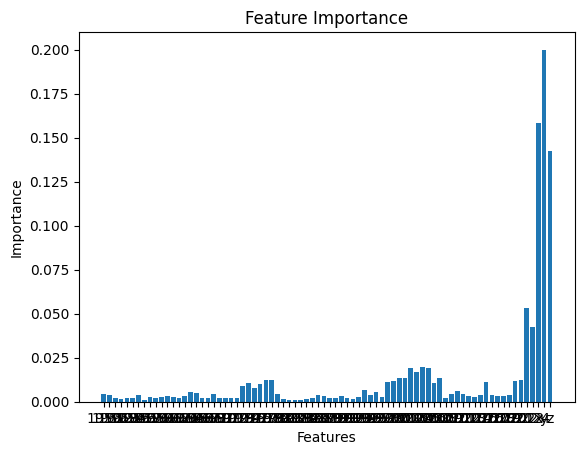

the biggest feature is:
y
the second biggest feature is:
x
the third biggest feature is:
z
the fourth biggest feature is:
2023


In [47]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
#print the biggest feature
print('the biggest feature is:')
print(X.columns[np.argmax(feature_importances)])
#print the second biggest feature
print('the second biggest feature is:')
print(X.columns[np.argsort(feature_importances)[-2]])
#print the third biggest feature
print('the third biggest feature is:')
print(X.columns[np.argsort(feature_importances)[-3]])
#print the fourth biggest feature
print('the fourth biggest feature is:')
print(X.columns[np.argsort(feature_importances)[-4]])

In [88]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred_logistic = logisticRegr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_logistic))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_logistic))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_logistic)))
print('R-squared:', metrics.r2_score(y_test, y_pred_logistic))

c:\Users\Lenovo\.conda\envs\tensor\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 8.834250764525994
Mean Squared Error: 201.5914373088685
Root Mean Squared Error: 14.198289943118802
R-squared: -0.09437105171702398


c:\Users\Lenovo\.conda\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
#XGBoost
#!pip install xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))
print('R-squared:', metrics.r2_score(y_test, y_pred_xgb))


Mean Absolute Error: 5.04924831565367
Mean Squared Error: 84.98349482132754
Root Mean Squared Error: 9.218649294843987
R-squared: 0.5386536360484938


In [54]:
X

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2018,2019,2020,2021,2022,2023,2024,x,y,z
0,8.628275,8.808599,8.995599,9.188642,9.388487,9.594825,9.807708,10.027581,10.252242,10.485677,...,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271,-0.900998,0.345797,0.261965
1,8.628275,8.808599,8.995599,9.188642,9.388487,9.594825,9.807708,10.027581,10.252242,10.485677,...,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271,-0.346740,-0.413390,0.841951
2,6.095700,6.216923,6.339571,6.462224,6.583977,6.703905,6.823518,6.942820,7.061460,7.181581,...,15.994957,16.109071,16.187335,16.230432,16.264683,16.311426,16.367933,-0.560001,0.828492,-0.000743
3,8.628275,8.808599,8.995599,9.188642,9.388487,9.594825,9.807708,10.027581,10.252242,10.485677,...,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271,-0.283144,0.858924,0.426708
4,14.080882,14.454772,14.847621,15.260566,15.696331,16.154463,16.632879,17.130411,17.647112,18.184153,...,63.582411,64.189415,64.718226,65.151603,65.644123,66.219161,66.791446,-0.425283,-0.407466,0.808150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36225,8.628275,8.808599,8.995599,9.188642,9.388487,9.594825,9.807708,10.027581,10.252242,10.485677,...,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271,-0.318347,-0.909559,-0.267127
36257,8.628275,8.808599,8.995599,9.188642,9.388487,9.594825,9.807708,10.027581,10.252242,10.485677,...,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271,0.019431,-0.448912,0.893365
36368,8.803428,8.973545,9.153268,9.341246,9.536531,9.738047,9.946867,10.161715,10.380430,10.602810,...,25.092092,25.496570,25.726172,25.840004,25.968434,26.108946,26.249640,0.716145,-0.546262,0.434435
36410,8.628275,8.808599,8.995599,9.188642,9.388487,9.594825,9.807708,10.027581,10.252242,10.485677,...,25.939171,26.155144,26.323940,26.445826,26.590781,26.769253,26.948271,-0.675952,-0.735159,-0.051283


In [55]:
y

,year
0,1950.0
1,1950.0
2,1950.0
3,1950.0
4,1950.0
...,...
36225,2012.0
36257,2012.0
36368,2012.0
36410,2012.0


# TASK
# change the y as cumulative sum
# change the time slot

In [61]:
#reshape the y with one hot encoding
#make it with 1950 - 2024 columns
#the value = 1 when the year is the y['year']same as the year in the data
#the value = 0 when the year is not the same as the year in the data
y = data[['year']]
y = pd.get_dummies(y['year'])
#make true to 1 and false to 0
y = y.astype(int)
#make the column int
y.columns = y.columns.astype(int)
#add columns to 2013 - 2024
for i in range(2013, 2025):
    if i not in y.columns:
        y[i] = 0
y

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X_long = X.melt(id_vars=['x', 'y','z'], var_name='year', value_name='value')
y_long = y.melt(var_name='year', value_name='target')


In [71]:
y_long

,year,target
0,1950,1
1,1950,1
2,1950,1
3,1950,1
4,1950,1
...,...,...
612895,2024,0
612896,2024,0
612897,2024,0
612898,2024,0
